Supervised Learning
* Both input and output are available



In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('auto-mpg.csv')
df.describe
df.isnull().sum


X = df['weight'].values.reshape(-1,1)
y = df['mpg'].values

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

import numpy as np

mpgcycov = np.cov(df['cylinders'].values,df['mpg'].values)
mpgcycor = df[['cylinders', 'mpg']].corr()
print("Covariance:\n"+ str(mpgcycov))
print("\nCorrelation:\n"+ str(mpgcycor))


Covariance:
[[  2.89341544 -10.30891105]
 [-10.30891105  61.08961077]]

Correlation:
           cylinders       mpg
cylinders   1.000000 -0.775396
mpg        -0.775396  1.000000


=== REGRESSION ANALYSIS RESULTS ===
Regression Formula: MPG = 42.9493 + (-3.5629) × Weight
Alternative Format: y = 42.9493 + -3.5629x

Statistical Measures:
Slope (β1): -3.562887
Intercept (β0): 42.949314
Correlation coefficient (r): -0.775396
R-squared (r²): 0.601239
P-value: 4.50e-81
Standard Error: 4.9418

Interpretation: There is a strong negative linear relationship
between weight and MPG. Weight explains 60.1% of the variance in MPG.


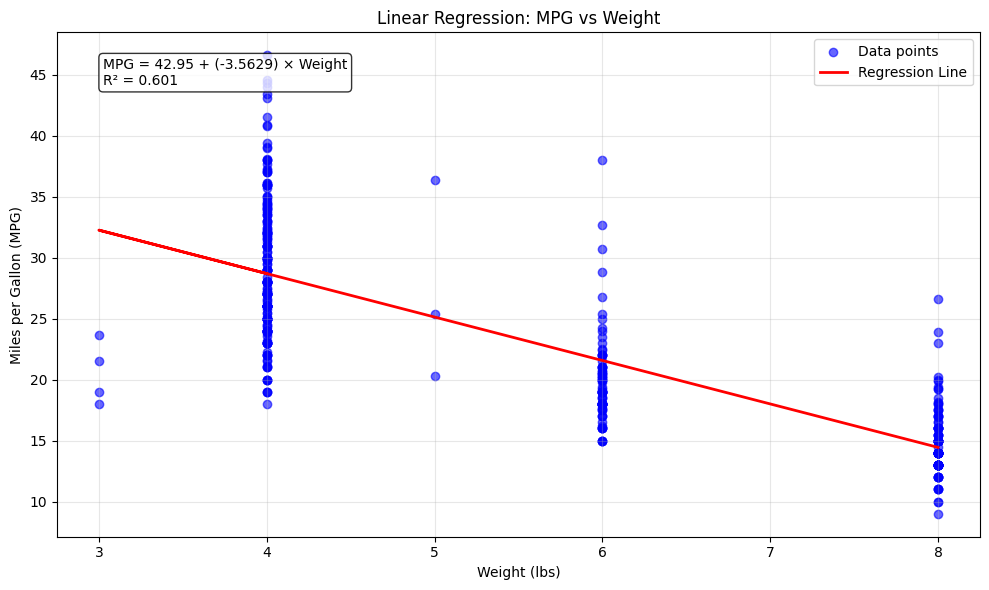

<Figure size 1000x400 with 0 Axes>

In [30]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mpg = pd.read_csv("auto-mpg.csv")

# Remove any missing values
mpg = mpg.dropna(subset=['cylinders', 'mpg'])

# Prepare data for regression
X = mpg['cylinders'].values.reshape(-1, 1)  # Independent variable
y = mpg['mpg'].values                    # Dependent variable

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate regression statistics
slope = model.coef_[0]
intercept = model.intercept_
r_value, p_value = stats.pearsonr(mpg['cylinders'], mpg['mpg'])
r_squared = r2_score(y, y_pred)
std_err = np.sqrt(np.sum((y - y_pred) ** 2) / (len(y) - 2))

# Print regression results
print("=== REGRESSION ANALYSIS RESULTS ===")
print(f"Regression Formula: MPG = {intercept:.4f} + ({slope:.4f}) × Weight")
print(f"Alternative Format: y = {intercept:.4f} + {slope:.4f}x")
print()
print("Statistical Measures:")
print(f"Slope (β1): {slope:.6f}")
print(f"Intercept (β0): {intercept:.6f}")
print(f"Correlation coefficient (r): {r_value:.6f}")
print(f"R-squared (r²): {r_squared:.6f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard Error: {std_err:.4f}")
print()

# Interpretation
if abs(r_value) > 0.7:
    strength = "strong"
elif abs(r_value) > 0.3:
    strength = "moderate"
else:
    strength = "weak"

direction = "negative" if r_value < 0 else "positive"
print(f"Interpretation: There is a {strength} {direction} linear relationship")
print(f"between weight and MPG. Weight explains {r_squared*100:.1f}% of the variance in MPG.")

# Create improved visualization
plt.figure(figsize=(10, 6))
plt.scatter(mpg['cylinders'], mpg['mpg'], alpha=0.6, color='blue', label='Data points')
plt.plot(mpg['cylinders'], y_pred, color='red', linewidth=2, label=f'Regression Line')

# Add regression equation to plot
equation_text = f'MPG = {intercept:.2f} + ({slope:.4f}) × Weight\nR² = {r_squared:.3f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=10)

plt.xlabel("Weight (lbs)")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Linear Regression: MPG vs Weight")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional diagnostic plot
plt.figure(figsize=(10, 4))


plt.show()

In [34]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mpg = pd.read_csv("auto-mpg.csv")

# Remove any missing values
mpg = mpg.dropna(subset=['cylinders', 'mpg'])

# Prepare data for regression
X = mpg[['weight', 'cylinders']].values  # Independent variable
y = mpg['mpg'].values                    # Dependent variable

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate regression statistics
slope1 = model.coef_[0]
slope2 = model.coef_[1]
intercept = model.intercept_
r_value, p_value = stats.pearsonr(mpg['cylinders'], mpg['mpg'])
r_squared = r2_score(y, y_pred)

# Calculate Adjusted R²
n = len(y)          # Number of observations
k = X.shape[1]      # Number of features (2 in this case: weight + cylinders)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

std_err = np.sqrt(np.sum((y - y_pred) ** 2) / (len(y) - 2))

# Print regression results
print("=== REGRESSION ANALYSIS RESULTS ===")
print(f"Regression Formula: MPG = {intercept:.4f} + ({slope1:.4f}) × Weight + ({slope2:.4f}) x Cylinders")
print(f"Alternative Format: y = {intercept:.4f} + {slope1:.4f}x + {slope2:.4f}x2")
print()
print("Statistical Measures:")
print(f"Slope (β1): {slope1:.6f}")
print(f"Slope (β2): {slope2:.6f}")
print(f"Intercept (β0): {intercept:.6f}")
print(f"Correlation coefficient (r): {r_value:.6f}")
print(f"R-squared (r²): {r_squared:.6f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.6f}")  # Added this line
print(f"P-value: {p_value:.2e}")
print(f"Standard Error: {std_err:.4f}")
print()


=== REGRESSION ANALYSIS RESULTS ===
Regression Formula: MPG = 46.3937 + (-0.0064) × Weight + (-0.7025) x Cylinders
Alternative Format: y = 46.3937 + -0.0064x + -0.7025x2

Statistical Measures:
Slope (β1): -0.006412
Slope (β2): -0.702508
Intercept (β0): 46.393702
Correlation coefficient (r): -0.775396
R-squared (r²): 0.696401
Adjusted R-squared: 0.694864
P-value: 4.50e-81
Standard Error: 4.3120



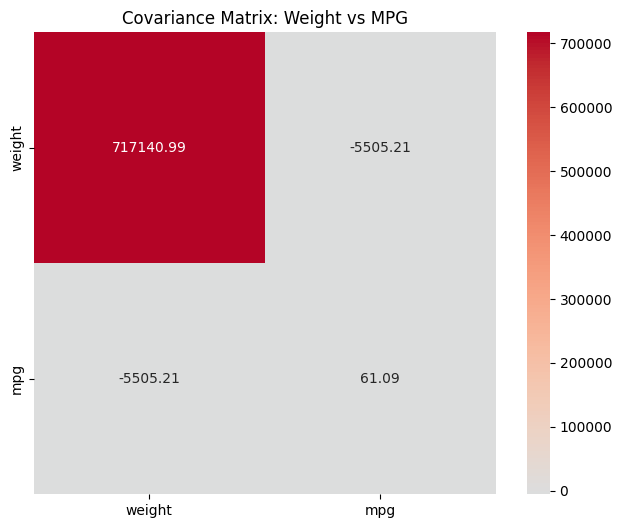

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate covariance matrix
cov_matrix = df[['weight', 'mpg']].cov()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Covariance Matrix: Weight vs MPG')
plt.show()


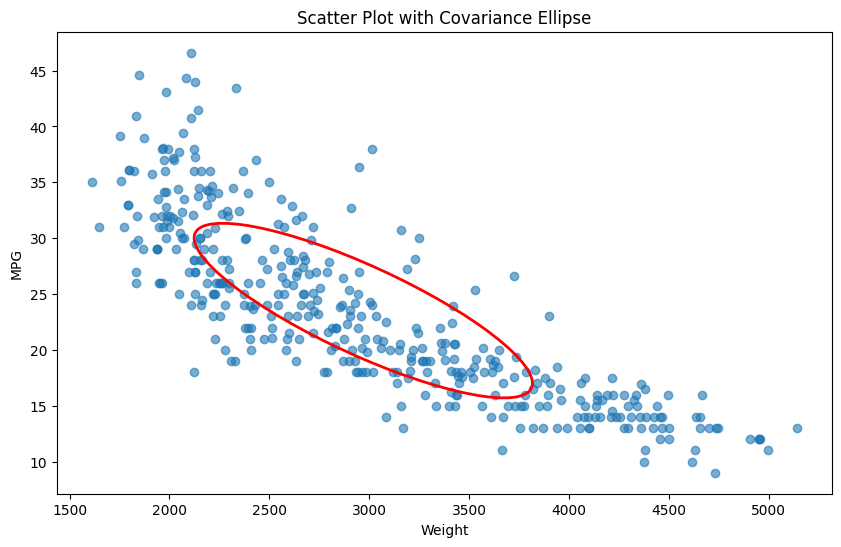

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.6)

# Add covariance ellipse (shows the "shape" of covariance)
mean_x, mean_y = df['weight'].mean(), df['mpg'].mean()
cov_matrix = np.cov(df['weight'], df['mpg'])

# Create ellipse
eigenvals, eigenvecs = np.linalg.eigh(cov_matrix)
angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
width, height = 2 * np.sqrt(eigenvals)

ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, 
                  fill=False, color='red', linewidth=2)
plt.gca().add_patch(ellipse)

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot with Covariance Ellipse')
plt.show()